## HORSES CLAIRE FACS ANALYSIS


In [1]:
import pandas as pd # Import pandas library for table management
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.tree import DecisionTreeClassifier # import Decision Tree Classifier model

# Include confusion matrix plot function to be used when we have defined a classifir (model) as we have (model with KNN)
from sklearn.metrics import plot_confusion_matrix

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

## Read FACS Data

In [2]:
# read dataset from csv
facs_df = pd.read_excel("Final data.xlsx")

## Analyse Data

In [3]:
# Check the fields, types and no-nulls
facs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDSubject                    296 non-null    object 
 1   Coder                        296 non-null    object 
 2   Test                         296 non-null    object 
 3   Order                        266 non-null    float64
 4   AU145-Blink                  296 non-null    int64  
 5   AU47-Half_blink              296 non-null    int64  
 6   AD1-Eye_white_increase       296 non-null    int64  
 7   EAD101-Ears_forward          296 non-null    int64  
 8   EAD103-Ear_flattener         296 non-null    int64  
 9   EAD104-Ear_rotator           296 non-null    int64  
 10  AU10-Upper_lip_raiser        233 non-null    float64
 11  AU12-Lip_corner_puller       212 non-null    float64
 12  AU16-Lower_lip_depressor     219 non-null    float64
 13  AU18-Lip_pucker     

In [4]:
# Takea look on the data, identify cardinal/ordinal/bynary features
facs_df.head(5)

,IDSubject,Coder,Test,Order,AU145-Blink,AU47-Half_blink,AD1-Eye_white_increase,EAD101-Ears_forward,EAD103-Ear_flattener,EAD104-Ear_rotator,...,AD19-Tongue_show,AD81-Chewing,AD51-Head_turn_left,AD52-Head_turn_right,AD53-Head_up,AD54-Head_down,AD56-Head_tilt_right,VC72-Lower_face_not_visible,Licking_box,Biting_box
0,Subject_1,Claire,Baseline,NaN,0,1,0,1,0,1,...,0.0,0,0,0,0,0,0,0,0.0,0
1,Subject_1,Claire,Anticipation,1.0,0,1,0,1,0,1,...,0.0,0,0,0,0,0,0,0,0.0,0
2,Subject_1,Claire,Anticipation,2.0,0,1,1,1,0,1,...,0.0,1,0,1,0,0,1,0,0.0,0
3,Subject_1,Claire,Anticipation,3.0,0,0,0,0,0,0,...,0.0,0,1,0,0,1,0,0,0.0,0
4,Subject_1,Claire,Frustration,1.0,0,0,1,1,0,1,...,0.0,0,0,0,0,0,0,0,0.0,0


In [5]:
facs_df.columns

Index(['IDSubject', 'Coder', 'Test', 'Order', 'AU145-Blink', 'AU47-Half_blink',
       'AD1-Eye_white_increase', 'EAD101-Ears_forward', 'EAD103-Ear_flattener',
       'EAD104-Ear_rotator', 'AU10-Upper_lip_raiser', 'AU12-Lip_corner_puller',
       'AU16-Lower_lip_depressor', 'AU18-Lip_pucker', 'AU25-Lips_part',
       'AU26-Jaw_drop', 'AUH13-Nostril_lift', 'AD19-Tongue_show',
       'AD81-Chewing', 'AD51-Head_turn_left', 'AD52-Head_turn_right',
       'AD53-Head_up', 'AD54-Head_down', 'AD56-Head_tilt_right',
       'VC72-Lower_face_not_visible', 'Licking_box', 'Biting_box'],
      dtype='object')

In [6]:
facs_df = facs_df [['AU145-Blink', 'AU47-Half_blink',
       'AD1-Eye_white_increase', 'EAD101-Ears_forward', 'EAD103-Ear_flattener',
       'EAD104-Ear_rotator', 'AU10-Upper_lip_raiser', 'AU12-Lip_corner_puller',
       'AU16-Lower_lip_depressor', 'AU18-Lip_pucker', 'AU25-Lips_part',
       'AU26-Jaw_drop', 'AUH13-Nostril_lift', 'AD19-Tongue_show',
       'AD81-Chewing', 'AD51-Head_turn_left', 'AD52-Head_turn_right',
       'AD53-Head_up', 'AD54-Head_down', 'AD56-Head_tilt_right',
       'VC72-Lower_face_not_visible', 'Licking_box', 'Biting_box','Test']]

In [7]:
# Corroborate no-null entries
#facs_df.isnull().sum()

In [8]:
#Fill all NULL entries with 0.5 (don't know)
facs_df = facs_df.fillna(0.5)

In [9]:
# Corroborate no-null entries
facs_df.isnull().sum()

AU145-Blink                    0
AU47-Half_blink                0
AD1-Eye_white_increase         0
EAD101-Ears_forward            0
EAD103-Ear_flattener           0
EAD104-Ear_rotator             0
AU10-Upper_lip_raiser          0
AU12-Lip_corner_puller         0
AU16-Lower_lip_depressor       0
AU18-Lip_pucker                0
AU25-Lips_part                 0
AU26-Jaw_drop                  0
AUH13-Nostril_lift             0
AD19-Tongue_show               0
AD81-Chewing                   0
AD51-Head_turn_left            0
AD52-Head_turn_right           0
AD53-Head_up                   0
AD54-Head_down                 0
AD56-Head_tilt_right           0
VC72-Lower_face_not_visible    0
Licking_box                    0
Biting_box                     0
Test                           0
dtype: int64

In [10]:
facs_df.head()

,AU145-Blink,AU47-Half_blink,AD1-Eye_white_increase,EAD101-Ears_forward,EAD103-Ear_flattener,EAD104-Ear_rotator,AU10-Upper_lip_raiser,AU12-Lip_corner_puller,AU16-Lower_lip_depressor,AU18-Lip_pucker,...,AD81-Chewing,AD51-Head_turn_left,AD52-Head_turn_right,AD53-Head_up,AD54-Head_down,AD56-Head_tilt_right,VC72-Lower_face_not_visible,Licking_box,Biting_box,Test
0,0,1,0,1,0,1,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,Baseline
1,0,1,0,1,0,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0,Anticipation
2,0,1,1,1,0,1,1.0,1.0,1.0,1.0,...,1,0,1,0,0,1,0,0.0,0,Anticipation
3,0,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0,1,0,0,1,0,0,0.0,0,Anticipation
4,0,0,1,1,0,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0,Frustration


## Prepare Data

In [11]:
# Convert all bynary categorical data to 0/1
categorical_2_numeric = {"Test":     {"Anticipation": 0, "Baseline": 1, "Disappointment": 2, "Frustration":3 }}
facs_df = facs_df.replace(categorical_2_numeric)

In [12]:
facs_df.head(5)

,AU145-Blink,AU47-Half_blink,AD1-Eye_white_increase,EAD101-Ears_forward,EAD103-Ear_flattener,EAD104-Ear_rotator,AU10-Upper_lip_raiser,AU12-Lip_corner_puller,AU16-Lower_lip_depressor,AU18-Lip_pucker,...,AD81-Chewing,AD51-Head_turn_left,AD52-Head_turn_right,AD53-Head_up,AD54-Head_down,AD56-Head_tilt_right,VC72-Lower_face_not_visible,Licking_box,Biting_box,Test
0,0,1,0,1,0,1,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,1
1,0,1,0,1,0,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0,0
2,0,1,1,1,0,1,1.0,1.0,1.0,1.0,...,1,0,1,0,0,1,0,0.0,0,0
3,0,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0,1,0,0,1,0,0,0.0,0,0
4,0,0,1,1,0,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0,3


In [13]:
facs_df [ 'Test'].value_counts()

2    90
3    89
0    87
1    30
Name: Test, dtype: int64

In [14]:
# Prepare feature and target tables
X = facs_df[['AU145-Blink', 'AU47-Half_blink', 'AD1-Eye_white_increase',
       'EAD101-Ears_forward', 'EAD103-Ear_flattener', 'EAD104-Ear_rotator',
       'AU10-Upper_lip_raiser', 'AU12-Lip_corner_puller',
       'AU16-Lower_lip_depressor', 'AU18-Lip_pucker', 'AU25-Lips_part',
       'AU26-Jaw_drop', 'AUH13-Nostril_lift', 'AD19-Tongue_show',
       'AD81-Chewing', 'AD51-Head_turn_left', 'AD52-Head_turn_right',
       'AD53-Head_up', 'AD54-Head_down', 'AD56-Head_tilt_right',
       'VC72-Lower_face_not_visible', 'Licking_box', 'Biting_box']]# taking the training data features
y=facs_df.Test# target of our training data

## Build Decision Tree Classifier model

In [15]:
best_clf_rf = DecisionTreeClassifier(class_weight='balanced')

In [16]:
param_grid = [    
    {'max_depth' : list(range(1,12)),
     'criterion' : ['gini', 'entropy', 'log_loss'],
    }
]

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
clf = GridSearchCV(best_clf_rf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [19]:
best_clf = clf.fit(X,y)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


In [20]:
best_clf.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)

In [21]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=5)

## Display the Decision Tree model uing Graphviz library

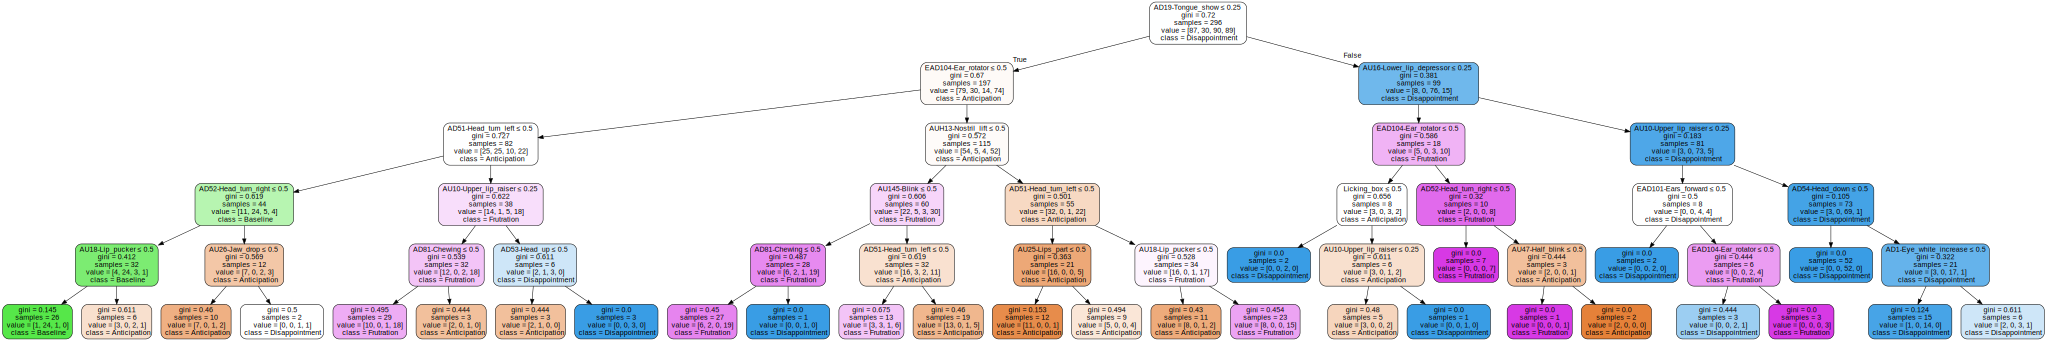

In [22]:
#In the cmd line type: conda install python-graphviz
from sklearn.tree import export_graphviz  
import graphviz

#In the cmd line type: conda install -c conda-forge pydotplus
import pydotplus # conda install -c conda-forge pydotplus

dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = X.columns, 
                           class_names = ["Anticipation", "Baseline", "Disappointment","Frutration" ],
                           rounded = True, filled=True, special_characters=True)
graph1 = graphviz.Source(dot_data) 

# save image to show below in markdown
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree_clf.png')
#show the full graph
graph1

## Make predictions for test data using trained model

In [23]:
# Predict values for Test data using trained classifier
predicted_y = tree_clf.predict(X)

## Measure model performance using Test data

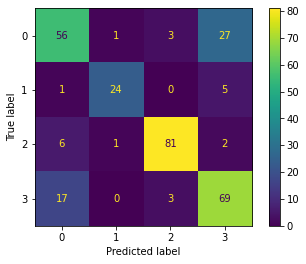

In [116]:
# Show confusion matrix
plot_confusion_matrix(tree_clf,X,y) 

In [25]:
# Calculate metrics
# Accuracy using SKLEARN
print("Measurement for Test data:")
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y, predicted_y))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(y, predicted_y,average='weighted'))

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(y, predicted_y,average='weighted'))

Measurement for Test data:
Accuracy:  0.777027027027027
Recall:  0.777027027027027
Precision:  0.7838066566347449


## Checking Feature Importance

Decision Tree Feature Importance:


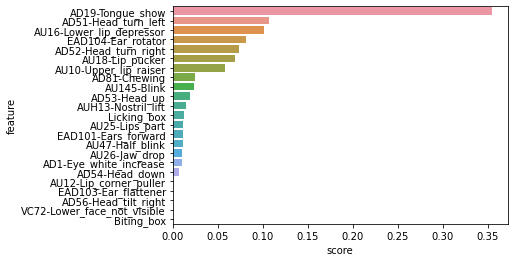

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
feature_score_DT = tree_clf.feature_importances_
df_feature_DT = pd.DataFrame(data=list(X), columns=["feature"])
df_feature_DT["score"]= feature_score_DT
df_feature_DT = df_feature_DT.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_DT)
print('Decision Tree Feature Importance:')
plt.show()

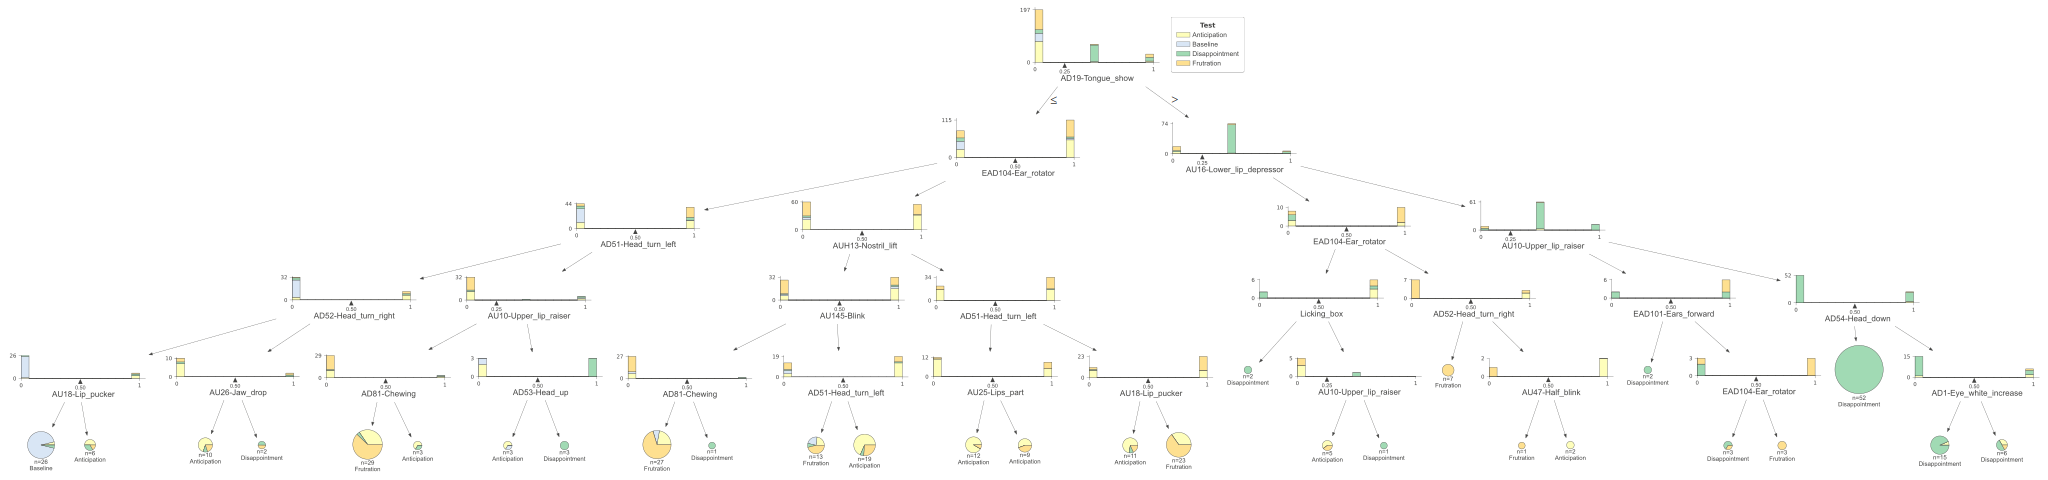

In [27]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree_clf, X, y,
                target_name="Test",
                feature_names=X.columns,
                class_names= ["Anticipation", "Baseline", "Disappointment","Frutration" ])

viz

In [28]:
tree_clf1 = DecisionTreeClassifier(max_depth=1,class_weight='balanced')
tree_clf1.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=1)

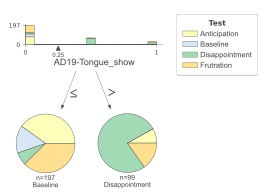

In [29]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree_clf1, X, y,
                target_name="Test",
                feature_names=X.columns,
                class_names= ["Anticipation", "Baseline", "Disappointment","Frutration" ])

viz

In [30]:
tree_clf2 = DecisionTreeClassifier(max_depth=2,class_weight='balanced')
tree_clf2.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

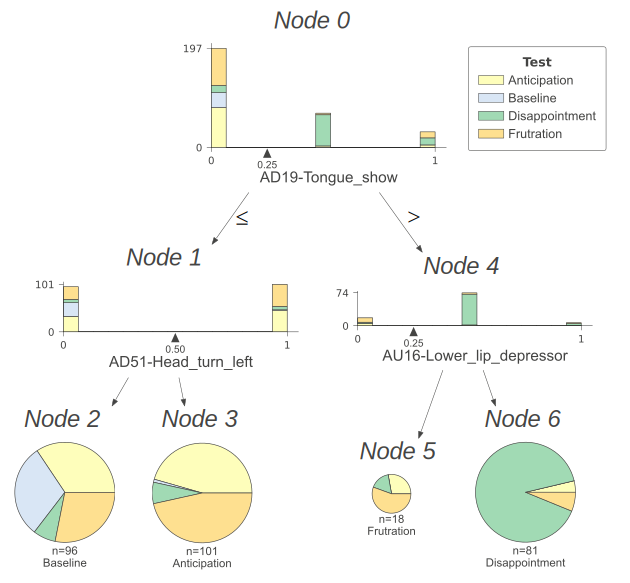

In [31]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree_clf2, X, y,
                target_name="Test",
                feature_names=X.columns,
                class_names= ["Anticipation", "Baseline", "Disappointment","Frutration" ],
               show_node_labels=True,scale=1.7)

viz

In [32]:
type(y)

pandas.core.series.Series

In [33]:
y_ant_frust_unified = y.copy()

In [34]:
y_ant_frust_unified = pd.Series([ 0 if x == 3 else x for x in y_ant_frust_unified])

In [35]:
type(y_ant_frust_unified)

pandas.core.series.Series

In [36]:
print(y_ant_frust_unified)

0      1
1      0
2      0
3      0
4      0
      ..
291    0
292    0
293    2
294    2
295    2
Length: 296, dtype: int64


In [114]:
tree_clf1_uni = DecisionTreeClassifier(max_depth=4,class_weight='balanced',min_samples_leaf=40)
tree_clf1_uni.fit(X,y_ant_frust_unified)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=40)

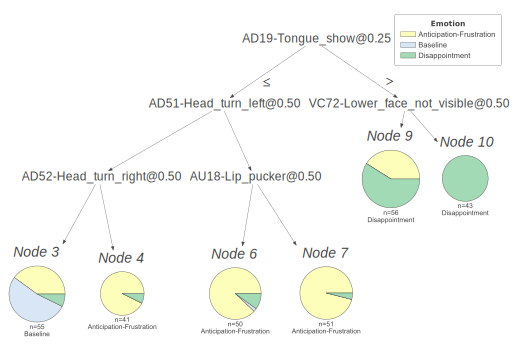

In [115]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree_clf1_uni, X, y_ant_frust_unified,
                target_name="Emotion",
                feature_names=X.columns,
                class_names= ["Anticipation-Frustration", "Baseline", "Disappointment"],
               show_node_labels=True,scale=1,fancy=False)

viz

In [39]:
tree_clf2_uni = DecisionTreeClassifier(max_depth=2,class_weight='balanced')
tree_clf2_uni.fit(X,y_ant_frust_unified)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

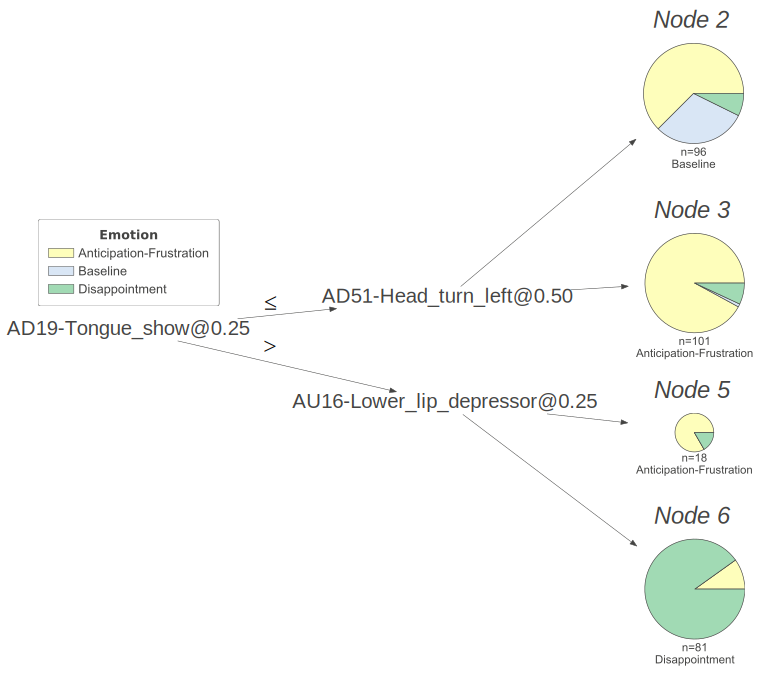

In [40]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree_clf2_uni, X, y_ant_frust_unified,
                target_name="Emotion",
                feature_names=X.columns,
                class_names= ["Anticipation-Frustration", "Baseline", "Disappointment"],
               show_node_labels=True,scale=1.7,orientation='LR',fancy=False)

viz

In [41]:
print(classification_report(y,predicted_y, target_names=["Anticipation", "Baseline", "Disappointment","Frustration"]))

                precision    recall  f1-score   support

  Anticipation       0.70      0.64      0.67        87
      Baseline       0.92      0.80      0.86        30
Disappointment       0.93      0.90      0.92        90
   Frustration       0.67      0.78      0.72        89

      accuracy                           0.78       296
     macro avg       0.81      0.78      0.79       296
  weighted avg       0.78      0.78      0.78       296



In [42]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.774


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
optlogModel =  GradientBoostingClassifier( n_estimators = 90, max_depth = 4, learning_rate = 0.1)

In [45]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X)

10

In [46]:
X

,AU145-Blink,AU47-Half_blink,AD1-Eye_white_increase,EAD101-Ears_forward,EAD103-Ear_flattener,EAD104-Ear_rotator,AU10-Upper_lip_raiser,AU12-Lip_corner_puller,AU16-Lower_lip_depressor,AU18-Lip_pucker,...,AD19-Tongue_show,AD81-Chewing,AD51-Head_turn_left,AD52-Head_turn_right,AD53-Head_up,AD54-Head_down,AD56-Head_tilt_right,VC72-Lower_face_not_visible,Licking_box,Biting_box
0,0,1,0,1,0,1,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0.0,0
1,0,1,0,1,0,1,0.0,0.0,1.0,1.0,...,0.0,0,0,0,0,0,0,0,0.0,0
2,0,1,1,1,0,1,1.0,1.0,1.0,1.0,...,0.0,1,0,1,0,0,1,0,0.0,0
3,0,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0,1,0,0,1,0,0,0.0,0
4,0,0,1,1,0,1,0.0,0.0,1.0,1.0,...,0.0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,1,1,0,1,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0.0,0
292,0,0,1,1,0,1,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0.0,0
293,1,1,0,0,0,0,0.5,0.5,0.5,0.5,...,0.5,0,0,1,0,0,0,1,1.0,0
294,1,0,1,0,0,0,0.5,0.5,0.5,0.5,...,0.5,0,0,0,1,0,1,1,1.0,0


In [47]:
XX = X.to_numpy()

In [48]:
# prepare metric lists
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold {i}:")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={test_index}")
  # Train optimal model
  optlogModel.fit(XX[train_index],y[train_index])

  # Predict 
  y_predicted = optlogModel.predict(XX[test_index])
  #print(y_predicted)

  # measure performance and store in lists
  accuracy = accuracy_score(y[test_index],y_predicted)
  accuracy_list.append(accuracy)
  precision = precision_score(y[test_index],y_predicted,average='weighted')
  precision_list.append(precision)
  recall = recall_score(y[test_index],y_predicted,average='weighted')
  recall_list.append(recall)
  print("Accuracy:",accuracy,"Precision:",precision,"Recall:",recall)

  # Print confusion matrix
  print(confusion_matrix(y[test_index], y_predicted))

Fold 0:
Accuracy: 0.6 Precision: 0.6812121212121213 Recall: 0.6
[[3 0 0 3]
 [0 3 1 0]
 [3 0 9 0]
 [5 0 0 3]]
Fold 1:
Accuracy: 0.5666666666666667 Precision: 0.674074074074074 Recall: 0.5666666666666667
[[4 0 0 4]
 [0 3 0 0]
 [4 0 6 1]
 [4 0 0 4]]
Fold 2:
Accuracy: 0.5333333333333333 Precision: 0.6427777777777778 Recall: 0.5333333333333333
[[3 1 1 8]
 [0 1 0 0]
 [0 1 6 1]
 [1 0 1 6]]
Fold 3:
Accuracy: 0.7 Precision: 0.6587412587412588 Recall: 0.7
[[ 1  0  0  5]
 [ 0  3  0  0]
 [ 0  0 11  0]
 [ 2  0  2  6]]
Fold 4:
Accuracy: 0.5666666666666667 Precision: 0.653030303030303 Recall: 0.5666666666666667
[[4 0 0 7]
 [0 3 0 1]
 [0 0 8 1]
 [4 0 0 2]]
Fold 5:
Accuracy: 0.7 Precision: 0.7103030303030302 Recall: 0.7
[[3 0 0 4]
 [0 3 0 0]
 [1 0 9 1]
 [2 0 1 6]]
Fold 6:
Accuracy: 0.7931034482758621 Precision: 0.7982758620689655 Recall: 0.7931034482758621
[[5 0 2 1]
 [0 3 0 0]
 [1 0 6 0]
 [2 0 0 9]]
Fold 7:
Accuracy: 0.5862068965517241 Precision: 0.5954022988505747 Recall: 0.5862068965517241
[[3 0 3 3

In [49]:
import numpy as np
print("Avg for all folds: Accuracy-",np.nanmean(accuracy_list),"Precision-",np.nanmean(precision_list),"Recall-",np.nanmean(recall_list))

Avg for all folds: Accuracy- 0.635632183908046 Precision- 0.6755196036402933 Recall- 0.635632183908046


# PAPER CODE FROM HERE

In [124]:
optlogModel =  DecisionTreeClassifier(max_depth = 4,class_weight='balanced',min_samples_leaf=15)

In [125]:
optlogModel.fit(XX,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=15)

In [127]:
# Predict values for Test data using trained classifier
predicted_y = optlogModel.predict(XX)

## Measure model performance using Test data

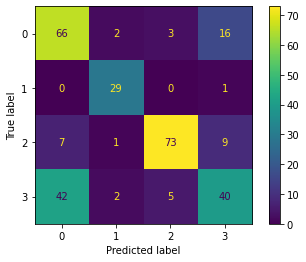

In [131]:
# Show confusion matrix
plot_confusion_matrix(optlogModel,XX,y) 

In [129]:
plt.savefig("confmatrix_saved.jpg")

<Figure size 432x288 with 0 Axes>

In [52]:
# prepare metric lists
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold {i}:")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={test_index}")
  # Train optimal model
  optlogModel.fit(XX[train_index],y[train_index])

  # Predict 
  y_predicted = optlogModel.predict(XX[test_index])
  #print(y_predicted)

  # measure performance and store in lists
  accuracy = accuracy_score(y[test_index],y_predicted)
  accuracy_list.append(accuracy)
  precision = precision_score(y[test_index],y_predicted,average='weighted')
  precision_list.append(precision)
  recall = recall_score(y[test_index],y_predicted,average='weighted')
  recall_list.append(recall)
  print("Accuracy:",accuracy,"Precision:",precision,"Recall:",recall)

  # Print confusion matrix
  print(confusion_matrix(y[test_index], y_predicted))

Fold 0:
Accuracy: 0.6333333333333333 Precision: 0.6862301587301587 Recall: 0.6333333333333333
[[ 2  1  2  3]
 [ 0  1  0  0]
 [ 0  1 11  0]
 [ 1  2  1  5]]
Fold 1:
Accuracy: 0.5666666666666667 Precision: 0.5908008658008658 Recall: 0.5666666666666667
[[7 3 1 4]
 [0 1 0 0]
 [0 0 6 0]
 [4 0 1 3]]
Fold 2:
Accuracy: 0.43333333333333335 Precision: 0.3430687830687831 Recall: 0.43333333333333335
[[1 2 2 2]
 [0 3 0 0]
 [3 0 9 0]
 [5 0 3 0]]
Fold 3:
Accuracy: 0.6 Precision: 0.693888888888889 Recall: 0.6
[[4 1 0 1]
 [0 3 0 0]
 [1 0 6 0]
 [5 2 2 5]]
Fold 4:
Accuracy: 0.6666666666666666 Precision: 0.6878205128205128 Recall: 0.6666666666666666
[[3 1 0 5]
 [0 6 0 0]
 [0 0 4 1]
 [1 1 1 7]]
Fold 5:
Accuracy: 0.6666666666666666 Precision: 0.7416666666666667 Recall: 0.6666666666666666
[[6 2 1 0]
 [0 6 0 0]
 [0 0 7 5]
 [2 0 0 1]]
Fold 6:
Accuracy: 0.5862068965517241 Precision: 0.7432601880877743 Recall: 0.5862068965517241
[[3 4 0 0]
 [0 4 0 0]
 [0 0 9 0]
 [4 3 1 1]]
Fold 7:
Accuracy: 0.41379310344827586 Pr

In [53]:
import numpy as np
print("Avg for all folds: Accuracy-",np.nanmean(accuracy_list),"Precision-",np.nanmean(precision_list),"Recall-",np.nanmean(recall_list))

Avg for all folds: Accuracy- 0.5704597701149425 Precision- 0.6282088412864275 Recall- 0.5704597701149425


Decision Tree Feature Importance:


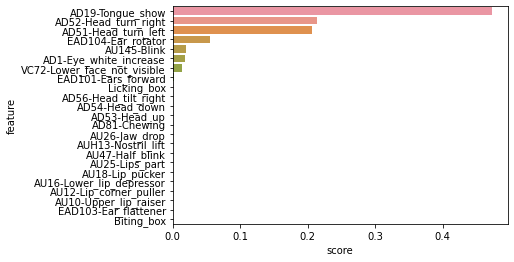

In [54]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
feature_score_DT = optlogModel.feature_importances_
df_feature_DT = pd.DataFrame(data=list(X), columns=["feature"])
df_feature_DT["score"]= feature_score_DT
df_feature_DT = df_feature_DT.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_DT)
print('Decision Tree Feature Importance:')
plt.show()

In [55]:
optlogModel =  DecisionTreeClassifier(max_depth = 2,class_weight='balanced')

In [56]:
optlogModel.fit(XX,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

In [57]:
# prepare metric lists
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold {i}:")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={test_index}")
  # Train optimal model
  optlogModel.fit(XX[train_index],y[train_index])

  # Predict 
  y_predicted = optlogModel.predict(XX[test_index])
  #print(y_predicted)

  # measure performance and store in lists
  accuracy = accuracy_score(y[test_index],y_predicted)
  accuracy_list.append(accuracy)
  precision = precision_score(y[test_index],y_predicted,average='weighted')
  precision_list.append(precision)
  recall = recall_score(y[test_index],y_predicted,average='weighted')
  recall_list.append(recall)
  print("Accuracy:",accuracy,"Precision:",precision,"Recall:",recall)

  # Print confusion matrix
  print(confusion_matrix(y[test_index], y_predicted))

Fold 0:
Accuracy: 0.6 Precision: 0.5408831908831909 Recall: 0.6
[[0 1 0 5]
 [0 2 0 0]
 [0 0 8 0]
 [0 5 1 8]]
Fold 1:
Accuracy: 0.5333333333333333 Precision: 0.5072293447293448 Recall: 0.5333333333333333
[[5 6 0 0]
 [0 4 0 0]
 [0 2 7 0]
 [4 1 1 0]]
Fold 2:
Accuracy: 0.43333333333333335 Precision: 0.4125356125356125 Recall: 0.43333333333333335
[[0 4 0 9]
 [0 4 0 1]
 [0 0 8 2]
 [0 1 0 1]]
Fold 3:
Accuracy: 0.4666666666666667 Precision: 0.5570562770562771 Recall: 0.4666666666666667
[[5 5 1 1]
 [0 2 0 0]
 [1 1 6 0]
 [5 2 0 1]]
Fold 4:
Accuracy: 0.5333333333333333 Precision: 0.4605769230769231 Recall: 0.5333333333333333
[[5 2 0 0]
 [0 3 0 0]
 [1 0 8 1]
 [7 3 0 0]]
Fold 5:
Accuracy: 0.4666666666666667 Precision: 0.42 Recall: 0.4666666666666667
[[0 1 0 5]
 [0 3 0 0]
 [0 3 7 1]
 [0 3 3 4]]
Fold 6:
Accuracy: 0.5862068965517241 Precision: 0.7796934865900383 Recall: 0.5862068965517241
[[ 3  5  1  0]
 [ 0  1  0  0]
 [ 1  0 11  0]
 [ 2  3  0  2]]
Fold 7:
Accuracy: 0.5862068965517241 Precision: 0.551

In [58]:
import numpy as np
print("Avg for all folds: Accuracy-",np.nanmean(accuracy_list),"Precision-",np.nanmean(precision_list),"Recall-",np.nanmean(recall_list))

Avg for all folds: Accuracy- 0.5136781609195402 Precision- 0.49708319777285304 Recall- 0.5136781609195402


Decision Tree Feature Importance:


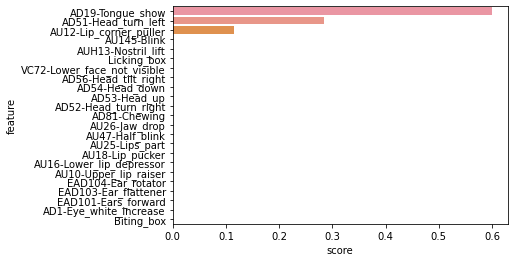

In [59]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
feature_score_DT = optlogModel.feature_importances_
df_feature_DT = pd.DataFrame(data=list(X), columns=["feature"])
df_feature_DT["score"]= feature_score_DT
df_feature_DT = df_feature_DT.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_DT)
print('Decision Tree Feature Importance:')
plt.show()

In [60]:
from itertools import combinations

AU_pairs = list(combinations(X.columns, 2))

In [61]:
AU_pairs

[('AU145-Blink', 'AU47-Half_blink'),
 ('AU145-Blink', 'AD1-Eye_white_increase'),
 ('AU145-Blink', 'EAD101-Ears_forward'),
 ('AU145-Blink', 'EAD103-Ear_flattener'),
 ('AU145-Blink', 'EAD104-Ear_rotator'),
 ('AU145-Blink', 'AU10-Upper_lip_raiser'),
 ('AU145-Blink', 'AU12-Lip_corner_puller'),
 ('AU145-Blink', 'AU16-Lower_lip_depressor'),
 ('AU145-Blink', 'AU18-Lip_pucker'),
 ('AU145-Blink', 'AU25-Lips_part'),
 ('AU145-Blink', 'AU26-Jaw_drop'),
 ('AU145-Blink', 'AUH13-Nostril_lift'),
 ('AU145-Blink', 'AD19-Tongue_show'),
 ('AU145-Blink', 'AD81-Chewing'),
 ('AU145-Blink', 'AD51-Head_turn_left'),
 ('AU145-Blink', 'AD52-Head_turn_right'),
 ('AU145-Blink', 'AD53-Head_up'),
 ('AU145-Blink', 'AD54-Head_down'),
 ('AU145-Blink', 'AD56-Head_tilt_right'),
 ('AU145-Blink', 'VC72-Lower_face_not_visible'),
 ('AU145-Blink', 'Licking_box'),
 ('AU145-Blink', 'Biting_box'),
 ('AU47-Half_blink', 'AD1-Eye_white_increase'),
 ('AU47-Half_blink', 'EAD101-Ears_forward'),
 ('AU47-Half_blink', 'EAD103-Ear_flattene

In [62]:
AU_pairs_df = pd.DataFrame(data=[])

In [63]:
for pair in AU_pairs:
    AU_pairs_df [ pair ] = ((X [ pair[0] ] + X [ pair[1] ])/2)

In [64]:
AU_pairs_df

,"(AU145-Blink, AU47-Half_blink)","(AU145-Blink, AD1-Eye_white_increase)","(AU145-Blink, EAD101-Ears_forward)","(AU145-Blink, EAD103-Ear_flattener)","(AU145-Blink, EAD104-Ear_rotator)","(AU145-Blink, AU10-Upper_lip_raiser)","(AU145-Blink, AU12-Lip_corner_puller)","(AU145-Blink, AU16-Lower_lip_depressor)","(AU145-Blink, AU18-Lip_pucker)","(AU145-Blink, AU25-Lips_part)",...,"(AD54-Head_down, AD56-Head_tilt_right)","(AD54-Head_down, VC72-Lower_face_not_visible)","(AD54-Head_down, Licking_box)","(AD54-Head_down, Biting_box)","(AD56-Head_tilt_right, VC72-Lower_face_not_visible)","(AD56-Head_tilt_right, Licking_box)","(AD56-Head_tilt_right, Biting_box)","(VC72-Lower_face_not_visible, Licking_box)","(VC72-Lower_face_not_visible, Biting_box)","(Licking_box, Biting_box)"
0,0.5,0.0,0.5,0.0,0.5,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.5,0.0,0.5,0.00,0.00,0.50,0.50,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.5,0.5,0.0,0.5,0.50,0.50,0.50,0.50,0.50,...,0.5,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.50,0.00,...,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.5,0.0,0.5,0.00,0.00,0.50,0.50,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.0,0.5,0.5,0.0,0.5,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292,0.0,0.5,0.5,0.0,0.5,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,1.0,0.5,0.5,0.5,0.5,0.75,0.75,0.75,0.75,0.75,...,0.0,0.5,0.5,0.0,0.5,0.5,0.0,1.0,0.5,0.5
294,0.5,1.0,0.5,0.5,0.5,0.75,0.75,0.75,0.75,0.75,...,0.5,0.5,0.5,0.0,1.0,1.0,0.5,1.0,0.5,0.5


In [65]:
XX = AU_pairs_df.to_numpy()

In [121]:
optlogModel =  DecisionTreeClassifier(max_depth = 4,class_weight='balanced',min_samples_leaf=15)

In [122]:
# prepare metric lists
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold {i}:")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={test_index}")
  # Train optimal model
  optlogModel.fit(XX[train_index],y[train_index])

  # Predict 
  y_predicted = optlogModel.predict(XX[test_index])
  #print(y_predicted)

  # measure performance and store in lists
  accuracy = accuracy_score(y[test_index],y_predicted)
  accuracy_list.append(accuracy)
  precision = precision_score(y[test_index],y_predicted,average='weighted')
  precision_list.append(precision)
  recall = recall_score(y[test_index],y_predicted,average='weighted')
  recall_list.append(recall)
  print("Accuracy:",accuracy,"Precision:",precision,"Recall:",recall)

  # Print confusion matrix
  print(confusion_matrix(y[test_index], y_predicted))

Fold 0:
Accuracy: 0.43333333333333335 Precision: 0.5388888888888889 Recall: 0.43333333333333335
[[1 0 1 3]
 [0 2 0 0]
 [2 0 6 1]
 [9 0 1 4]]
Fold 1:
Accuracy: 0.7 Precision: 0.7354545454545455 Recall: 0.7
[[6 1 0 1]
 [0 3 0 0]
 [1 1 9 0]
 [4 0 1 3]]
Fold 2:
Accuracy: 0.6333333333333333 Precision: 0.6915151515151515 Recall: 0.6333333333333333
[[4 0 1 4]
 [0 2 0 0]
 [0 0 9 3]
 [1 0 2 4]]
Fold 3:
Accuracy: 0.5333333333333333 Precision: 0.48680555555555555 Recall: 0.5333333333333333
[[1 0 3 8]
 [0 2 0 0]
 [0 0 6 1]
 [2 0 0 7]]
Fold 4:
Accuracy: 0.7333333333333333 Precision: 0.7598544973544974 Recall: 0.7333333333333333
[[5 0 0 3]
 [0 6 0 0]
 [0 0 7 2]
 [1 1 1 4]]
Fold 5:
Accuracy: 0.7 Precision: 0.7238095238095238 Recall: 0.7
[[9 0 0 4]
 [0 3 0 0]
 [0 0 7 1]
 [4 0 0 2]]
Fold 6:
Accuracy: 0.6551724137931034 Precision: 0.660919540229885 Recall: 0.6551724137931034
[[ 2  2  1  2]
 [ 0  3  0  0]
 [ 1  0 10  0]
 [ 3  1  0  4]]
Fold 7:
Accuracy: 0.6206896551724138 Precision: 0.6905393457117595 Re

In [123]:
import numpy as np
print("Avg for all folds: Accuracy-",np.nanmean(accuracy_list),"Precision-",np.nanmean(precision_list),"Recall-",np.nanmean(recall_list))

Avg for all folds: Accuracy- 0.607816091954023 Precision- 0.6342993145105214 Recall- 0.607816091954023


In [ ]:
plt.savefig("confmatrix_saved.jpg")

In [95]:
str_list = [ pair[0]+"-"+pair[1] for pair in list(AU_pairs_df.columns)]

In [96]:
str_list

['AU145-Blink-AU47-Half_blink',
 'AU145-Blink-AD1-Eye_white_increase',
 'AU145-Blink-EAD101-Ears_forward',
 'AU145-Blink-EAD103-Ear_flattener',
 'AU145-Blink-EAD104-Ear_rotator',
 'AU145-Blink-AU10-Upper_lip_raiser',
 'AU145-Blink-AU12-Lip_corner_puller',
 'AU145-Blink-AU16-Lower_lip_depressor',
 'AU145-Blink-AU18-Lip_pucker',
 'AU145-Blink-AU25-Lips_part',
 'AU145-Blink-AU26-Jaw_drop',
 'AU145-Blink-AUH13-Nostril_lift',
 'AU145-Blink-AD19-Tongue_show',
 'AU145-Blink-AD81-Chewing',
 'AU145-Blink-AD51-Head_turn_left',
 'AU145-Blink-AD52-Head_turn_right',
 'AU145-Blink-AD53-Head_up',
 'AU145-Blink-AD54-Head_down',
 'AU145-Blink-AD56-Head_tilt_right',
 'AU145-Blink-VC72-Lower_face_not_visible',
 'AU145-Blink-Licking_box',
 'AU145-Blink-Biting_box',
 'AU47-Half_blink-AD1-Eye_white_increase',
 'AU47-Half_blink-EAD101-Ears_forward',
 'AU47-Half_blink-EAD103-Ear_flattener',
 'AU47-Half_blink-EAD104-Ear_rotator',
 'AU47-Half_blink-AU10-Upper_lip_raiser',
 'AU47-Half_blink-AU12-Lip_corner_pulle

In [97]:
optlogModel.fit(XX,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=15)

Decision Tree Feature Importance:


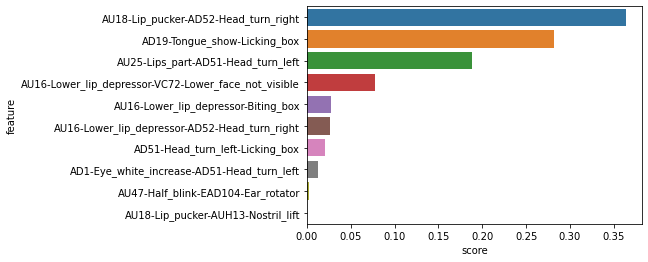

In [98]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
feature_score_DT = optlogModel.feature_importances_
df_feature_DT = pd.DataFrame(data=str_list, columns=["feature"])
df_feature_DT["score"]= feature_score_DT
df_feature_DT = df_feature_DT.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_DT[:10])
print('Decision Tree Feature Importance:')
plt.show()

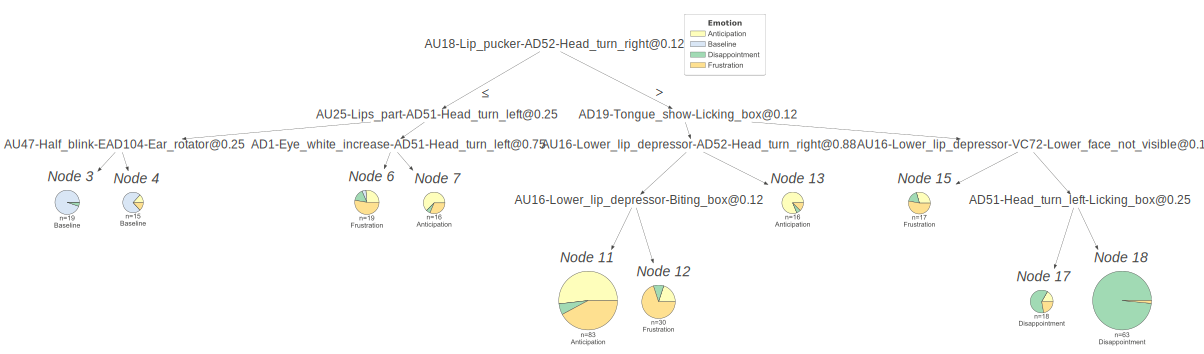

In [99]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(optlogModel, XX, y,
                target_name="Emotion",
                feature_names=str_list,
                class_names= ["Anticipation", "Baseline", "Disappointment","Frustration"],
               show_node_labels=True,scale=1,fancy=False)

viz

In [117]:
optlogModel =  DecisionTreeClassifier(max_depth = 4 ,class_weight='balanced',min_samples_leaf=15)

In [118]:
yy = y_ant_frust_unified.copy()

In [119]:
# prepare metric lists
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold {i}:")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={test_index}")
  # Train optimal model
  optlogModel.fit(XX[train_index],yy[train_index])

  # Predict 
  y_predicted = optlogModel.predict(XX[test_index])
  #print(y_predicted)

  # measure performance and store in lists
  accuracy = accuracy_score(yy[test_index],y_predicted)
  accuracy_list.append(accuracy)
  precision = precision_score(yy[test_index],y_predicted,average='weighted')
  precision_list.append(precision)
  recall = recall_score(yy[test_index],y_predicted,average='weighted')
  recall_list.append(recall)
  print("Accuracy:",accuracy,"Precision:",precision,"Recall:",recall)

  # Print confusion matrix
  print(confusion_matrix(yy[test_index], y_predicted))

Fold 0:
Accuracy: 0.8333333333333334 Precision: 0.8481481481481481 Recall: 0.8333333333333334
[[13  1  1]
 [ 0  4  0]
 [ 2  1  8]]
Fold 1:
Accuracy: 0.9333333333333333 Precision: 0.9416666666666667 Recall: 0.9333333333333333
[[14  0  0]
 [ 1  2  0]
 [ 1  0 12]]
Fold 2:
Accuracy: 0.8666666666666667 Precision: 0.8796296296296297 Recall: 0.8666666666666667
[[17  1  2]
 [ 0  5  0]
 [ 1  0  4]]
Fold 3:
Accuracy: 0.9 Precision: 0.9118421052631579 Recall: 0.9
[[17  1  0]
 [ 0  3  0]
 [ 2  0  7]]
Fold 4:
Accuracy: 0.8666666666666667 Precision: 0.8620289855072464 Recall: 0.8666666666666667
[[20  0  1]
 [ 0  2  0]
 [ 3  0  4]]
Fold 5:
Accuracy: 0.7666666666666667 Precision: 0.7861111111111112 Recall: 0.7666666666666667
[[13  1  1]
 [ 0  3  0]
 [ 5  0  7]]
Fold 6:
Accuracy: 0.896551724137931 Precision: 0.9206896551724137 Recall: 0.896551724137931
[[16  1  2]
 [ 0  4  0]
 [ 0  0  6]]
Fold 7:
Accuracy: 0.9655172413793104 Precision: 0.9673321234119782 Recall: 0.9655172413793104
[[18  0  0]
 [ 0  1  

In [120]:
import numpy as np
print("Avg for all folds: Accuracy-",np.nanmean(accuracy_list),"Precision-",np.nanmean(precision_list),"Recall-",np.nanmean(recall_list))

Avg for all folds: Accuracy- 0.8821839080459771 Precision- 0.8943215761022515 Recall- 0.8821839080459771


Decision Tree Feature Importance:


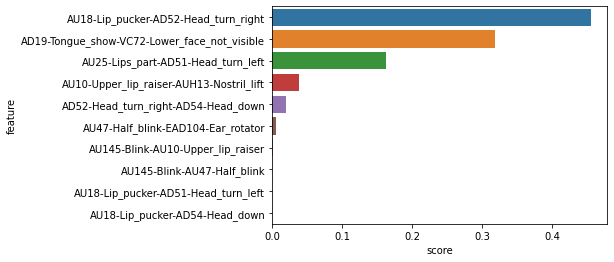

In [104]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
feature_score_DT = optlogModel.feature_importances_
df_feature_DT = pd.DataFrame(data=str_list, columns=["feature"])
df_feature_DT["score"]= feature_score_DT
df_feature_DT = df_feature_DT.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_DT[:10])
print('Decision Tree Feature Importance:')
plt.show()

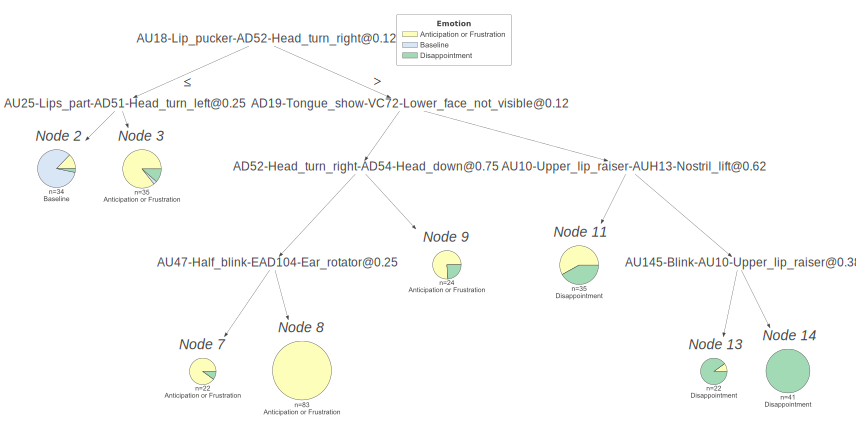

In [105]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(optlogModel, XX, yy,
                target_name="Emotion",
                feature_names=str_list,
                class_names= ["Anticipation or Frustration", "Baseline", "Disappointment"],
               show_node_labels=True,scale=1,fancy=False)

viz